<center><h1><b>INFOSYS 722 - Iteration 4 Jupter Notebook</b></h1></center>
<br></br>
<center><h1>A solution for ANZ to predict customers’ income level.</h1></center>
<center>Zuoru Jin - zjin526@aucklanduni.ac.nz<center>

In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration 4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/11 16:05:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


<h2>1. Load data</h2>

In [2]:
df_fin = spark.read.csv('finance.csv', header=True)
df_inf = spark.read.csv('infomation.csv', header=True)

In [3]:
print("Dataset: finance.csv")
df_fin.show(5)
print()
print("Dataset: infomation.csv")
df_inf.show(5)

Dataset: finance.csv
+---+------------+------------+
| ID|Capital gain|Capital loss|
+---+------------+------------+
|  1|           0|        4356|
|  2|           0|        4356|
|  3|           0|        4356|
|  4|           0|        3900|
|  5|           0|        3900|
+---+------------+------------+
only showing top 5 rows


Dataset: infomation.csv
+---+---------+------------+-------------+--------------+-----------------+-------------+-----+------+---+-------------------+--------------+------+
| ID|Workclass|   Education|Education num|Marital status|       Occupation| Relationship| Race|   Sex|Age|Work hours per week|Native country|Income|
+---+---------+------------+-------------+--------------+-----------------+-------------+-----+------+---+-------------------+--------------+------+
|  1|        ?|     HS-grad|            9|       Widowed|                ?|Not-in-family|White|Female| 90|                 40|   New Zealand| <=85K|
|  2|  Private|     HS-grad|            9|   

<h3>1.1 Check data type</h3>

In [4]:
print('Schema of finance.csv')
df_fin.printSchema()
print()
print('Schema of infomation.csv')
df_inf.printSchema()

Schema of finance.csv
root
 |-- ID: string (nullable = true)
 |-- Capital gain: string (nullable = true)
 |-- Capital loss: string (nullable = true)


Schema of infomation.csv
root
 |-- ID: string (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: string (nullable = true)
 |-- Marital status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Work hours per week: string (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)



<h3>1.2 Adjust data type</h3>

In [5]:
from pyspark.sql.types import (StructField,StringType,IntegerType,LongType,StructType)


fin_schema = [StructField('ID',IntegerType(),True),
              StructField('Capital gain',LongType(),True),
              StructField('Capital loss',LongType(),True)]

inf_schema = [StructField('ID',IntegerType(),True),
              StructField('Workclass',StringType(),True),
              StructField('Education',StringType(),True),
              StructField('Education num',IntegerType(),True),
              StructField('Marital status',StringType(),True),
              StructField('Occupation',StringType(),True),
              StructField('Relationship',StringType(),True),
              StructField('Race',StringType(),True),
              StructField('Sex',StringType(),True),
              StructField('Age',IntegerType(),True),
              StructField('Work hours per week',IntegerType(),True),
              StructField('Native country',StringType(),True),
              StructField('Income',StringType(),True)]

fin_struct = StructType(fields=fin_schema)
inf_struct = StructType(fields=inf_schema)


In [6]:
df_fin = spark.read.csv('finance.csv', header=True, schema=fin_struct)
df_inf = spark.read.csv('infomation.csv', header=True, schema=inf_struct)

print('Schema of finance.csv')
df_fin.printSchema()
print()
print('Schema of infomation.csv')
df_inf.printSchema()

Schema of finance.csv
root
 |-- ID: integer (nullable = true)
 |-- Capital gain: long (nullable = true)
 |-- Capital loss: long (nullable = true)


Schema of infomation.csv
root
 |-- ID: integer (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: integer (nullable = true)
 |-- Marital status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work hours per week: integer (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)



<h3>1.3 Merge data (With correct data type)</h3>

In [7]:
df = df_fin.join(df_inf,['ID'])
print("Dataset: Merged dataset")
df.show(5)

Dataset: Merged dataset
+---+------------+------------+---------+------------+-------------+--------------+-----------------+-------------+-----+------+---+-------------------+--------------+------+
| ID|Capital gain|Capital loss|Workclass|   Education|Education num|Marital status|       Occupation| Relationship| Race|   Sex|Age|Work hours per week|Native country|Income|
+---+------------+------------+---------+------------+-------------+--------------+-----------------+-------------+-----+------+---+-------------------+--------------+------+
|  1|           0|        4356|        ?|     HS-grad|            9|       Widowed|                ?|Not-in-family|White|Female| 90|                 40|   New Zealand| <=85K|
|  2|           0|        4356|  Private|     HS-grad|            9|       Widowed|  Exec-managerial|Not-in-family|White|Female| 82|                 18|   New Zealand| <=85K|
|  3|           0|        4356|        ?|Some-college|           10|       Widowed|                ?|

In [8]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Capital gain: long (nullable = true)
 |-- Capital loss: long (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: integer (nullable = true)
 |-- Marital status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work hours per week: integer (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)



<h2>2. Data exploration</h2>

In [9]:
# Explore the relation between education and income
df.createOrReplaceTempView('df_view')
result = spark.sql("SELECT `Education num` AS Education_level, COUNT(ID) AS High_income_population FROM df_view WHERE income='>85K' GROUP BY `Education num` ORDER BY COUNT(ID) DESC;")
result.show()

+---------------+----------------------+
|Education_level|High_income_population|
+---------------+----------------------+
|             13|                  2221|
|              9|                  1675|
|             10|                  1387|
|             14|                   959|
|             15|                   423|
|             11|                   361|
|             16|                   306|
|             12|                   265|
|              6|                    62|
|              7|                    60|
|              4|                    40|
|              8|                    33|
|              5|                    27|
|              3|                    16|
|              2|                     6|
+---------------+----------------------+



In [10]:
# Explore the relation between occupation and income
result = spark.sql("SELECT Occupation,AVG(CASE WHEN Income = '>85K' THEN 1.0 ELSE 0.0 END) as Proportion_Earning_Above_85000 FROM df_view GROUP BY Occupation ORDER BY Proportion_Earning_Above_85000 DESC;")
result.show()

+-----------------+------------------------------+
|       Occupation|Proportion_Earning_Above_85000|
+-----------------+------------------------------+
|  Exec-managerial|                       0.48401|
|   Prof-specialty|                       0.44903|
|  Protective-serv|                       0.32512|
|     Tech-support|                       0.30496|
|            Sales|                       0.26932|
|     Craft-repair|                       0.22664|
| Transport-moving|                       0.20038|
|     Adm-clerical|                       0.13448|
|Machine-op-inspct|                       0.12488|
|  Farming-fishing|                       0.11569|
|     Armed-Forces|                       0.11111|
|                ?|                       0.10364|
|Handlers-cleaners|                       0.06277|
|    Other-service|                       0.04158|
|  Priv-house-serv|                       0.00671|
+-----------------+------------------------------+



In [11]:
# Explore the porpotion of low/high income populations
result = spark.sql("SELECT Income,COUNT(*) as NumberOfPeople \
                   FROM df_view \
                   GROUP BY Income \
                   ORDER BY NumberOfPeople DESC;")
result.show()

+------+--------------+
|Income|NumberOfPeople|
+------+--------------+
| <=85K|         24720|
|  >85K|          7841|
+------+--------------+



In [12]:
# Explore if there is a correlation within working hours and income
from pyspark.sql.functions import when, lit

df = df.withColumn("Income binary", \
   when((df.Income == '>85K'), lit(1)) \
     .otherwise(lit(0)) \
  )

df.stat.corr('Work hours per week','Income binary')

0.22968906567080924

In [13]:
# Explore the stats of capital gain
df.select('Capital gain').describe().show()

+-------+------------------+
|summary|      Capital gain|
+-------+------------------+
|  count|             32561|
|   mean|1077.6488437087312|
| stddev| 7385.292084840311|
|    min|                 0|
|    max|             99999|
+-------+------------------+



<AxesSubplot:ylabel='Frequency'>

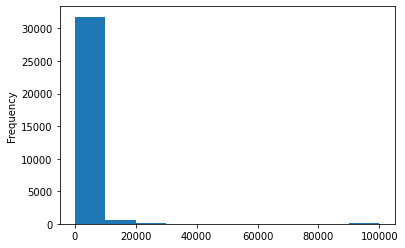

In [14]:
# Visualise capital gain
from pyspark import pandas

df_pd = df.toPandas()

df_pd['Capital gain'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

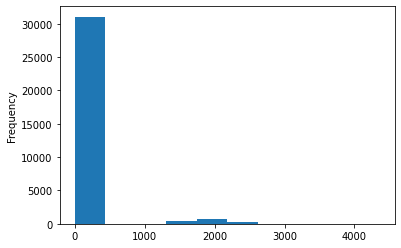

In [15]:
# Visualise capital loss
df_pd['Capital loss'].plot.hist()

<h2>3. Data preparation</h2>

<h3>3.1 Data quality inspection</h3>

In [16]:
print('-- Data quality of Workclass')
result = spark.sql('SELECT Workclass, COUNT(*) as Frequency FROM df_view GROUP BY Workclass ORDER BY Frequency DESC;')
result.show()

print('-- Data quality of Occupation')
result = spark.sql('SELECT Occupation, COUNT(*) as Frequency FROM df_view GROUP BY Occupation ORDER BY Frequency DESC;')
result.show()

print('-- Data quality of Native country')
result = spark.sql('SELECT `Native country`, COUNT(*) as Frequency FROM df_view GROUP BY `Native country` ORDER BY Frequency DESC;')
result.show(100)

-- Data quality of Workclass
+----------------+---------+
|       Workclass|Frequency|
+----------------+---------+
|         Private|    22696|
|      Government|     4351|
|Self-emp-not-inc|     2541|
|               ?|     1836|
|    Self-emp-inc|     1116|
|     Without-pay|       14|
|    Never-worked|        7|
+----------------+---------+

-- Data quality of Occupation
+-----------------+---------+
|       Occupation|Frequency|
+-----------------+---------+
|   Prof-specialty|     4140|
|     Craft-repair|     4099|
|  Exec-managerial|     4066|
|     Adm-clerical|     3770|
|            Sales|     3650|
|    Other-service|     3295|
|Machine-op-inspct|     2002|
|                ?|     1843|
| Transport-moving|     1597|
|Handlers-cleaners|     1370|
|  Farming-fishing|      994|
|     Tech-support|      928|
|  Protective-serv|      649|
|  Priv-house-serv|      149|
|     Armed-Forces|        9|
+-----------------+---------+

-- Data quality of Native country
+---------------

<h3>3.2 Row selection</h3>

<h4>3.2.1 Missing values</h4>

In [17]:
no_of_rows_before = df.count()
print(f"Number of rows before row selection: {no_of_rows_before}")

df_filtered = df.filter(df.Workclass!='?').filter(df.Occupation!='?').filter(df['Native Country']!='?')

no_of_rows_after = df_filtered.count()
print(f"Number of rows after row selection: {no_of_rows_after}")

Number of rows before row selection: 32561
Number of rows after row selection: 30162


<h4>3.2.2 Outliers and extremes</h4>

In [18]:
from pyspark.sql.functions import stddev, mean, col

df_no_missing = df_filtered
attributes = ['Capital gain', 'Capital loss', 'Work hours per week']

for attribute in attributes:
    # Calculate mean and standard deviation
    stats = df_no_missing.select(mean(col(attribute)).alias('mean'), stddev(col(attribute)).alias('stddev')).collect()[0]
    mean_val = stats['mean']
    stddev_val = stats['stddev']

    # Calculate outliers
    outliers = df_no_missing.filter((col(attribute) < mean_val - 3*stddev_val) | (col(attribute) > mean_val + 3*stddev_val)).filter((col(attribute) >= mean_val - 5*stddev_val) & (col(attribute) <= mean_val + 5*stddev_val))
    num_outliers = outliers.count()

    # Calculate extremes
    extremes = df_no_missing.filter((col(attribute) < mean_val - 5*stddev_val) | (col(attribute) > mean_val + 5*stddev_val))
    num_extremes = extremes.count()

    print(f"For attribute '{attribute}':")
    print(f"Number of outliers: {num_outliers}")
    print(f"Number of extremes: {num_extremes}\n")

For attribute 'Capital gain':
Number of outliers: 48
Number of extremes: 150

For attribute 'Capital loss':
Number of outliers: 1164
Number of extremes: 217

For attribute 'Work hours per week':
Number of outliers: 402
Number of extremes: 0



<h3>3.3 Attribute selection</h3>

In [19]:
# Remove irrellevant attributes
df_3_3 = df_no_missing.drop("ID", "Race", "Sex")
print("-- Current dataset attributes --")
print(df_3_3.columns)
df_3_3.printSchema()


-- Current dataset attributes --
['Capital gain', 'Capital loss', 'Workclass', 'Education', 'Education num', 'Marital status', 'Occupation', 'Relationship', 'Age', 'Work hours per week', 'Native country', 'Income', 'Income binary']
root
 |-- Capital gain: long (nullable = true)
 |-- Capital loss: long (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: integer (nullable = true)
 |-- Marital status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work hours per week: integer (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Income binary: integer (nullable = false)



<h3>3.4 Data construction</h3>

<h4>3.4.1 Net capital gain</h4>

In [20]:
# Construct 'Net capital gain'
df_3_4 = df_3_3.withColumn("Net capital gain", col("Capital gain") - col("Capital loss"))
df_3_4.columns
print(df_3_4.columns)
df_3_4.printSchema()

['Capital gain', 'Capital loss', 'Workclass', 'Education', 'Education num', 'Marital status', 'Occupation', 'Relationship', 'Age', 'Work hours per week', 'Native country', 'Income', 'Income binary', 'Net capital gain']
root
 |-- Capital gain: long (nullable = true)
 |-- Capital loss: long (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: integer (nullable = true)
 |-- Marital status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work hours per week: integer (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Income binary: integer (nullable = false)
 |-- Net capital gain: long (nullable = true)



In [21]:
df_3_4.select("Capital gain", "Capital loss", "Net capital gain").show()

+------------+------------+----------------+
|Capital gain|Capital loss|Net capital gain|
+------------+------------+----------------+
|           0|        4356|           -4356|
|           0|        3900|           -3900|
|           0|        3900|           -3900|
|           0|        3770|           -3770|
|           0|        3770|           -3770|
|           0|        3683|           -3683|
|           0|        3683|           -3683|
|           0|        3004|           -3004|
|           0|        2824|           -2824|
|           0|        2824|           -2824|
|           0|        2824|           -2824|
|           0|        2824|           -2824|
|           0|        2824|           -2824|
|           0|        2824|           -2824|
|           0|        2824|           -2824|
|           0|        2824|           -2824|
|           0|        2754|           -2754|
|           0|        2754|           -2754|
|           0|        2603|           -2603|
|         

<h4>3.4.2 Age group</h4>

In [22]:
df_3_4 = df_3_4.withColumn("Age group",
                   when((col("Age") >= 18) & (col("Age") <= 34), "Young")
                   .when((col("Age") >= 35) & (col("Age") <= 54), "Middle-aged")
                   .otherwise("Old"))

print(df_3_4.columns)
df_3_4.printSchema()

['Capital gain', 'Capital loss', 'Workclass', 'Education', 'Education num', 'Marital status', 'Occupation', 'Relationship', 'Age', 'Work hours per week', 'Native country', 'Income', 'Income binary', 'Net capital gain', 'Age group']
root
 |-- Capital gain: long (nullable = true)
 |-- Capital loss: long (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: integer (nullable = true)
 |-- Marital status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work hours per week: integer (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Income binary: integer (nullable = false)
 |-- Net capital gain: long (nullable = true)
 |-- Age group: string (nullable = false)



In [23]:
df_3_4.select("Age", "Age group").show(5)

+---+-----------+
|Age|  Age group|
+---+-----------+
| 82|        Old|
| 54|Middle-aged|
| 41|Middle-aged|
| 34|      Young|
| 38|Middle-aged|
+---+-----------+
only showing top 5 rows



<h4>3.4.3 Work intensity</h4>

In [24]:
df_3_4 = df_3_4.withColumn("Work intensity",
                   when((col("Work hours per week") >= 1) & (col("Work hours per week") <= 20), "Low")
                   .when((col("Work hours per week") > 20) & (col("Work hours per week") <= 40), "Normal")
                   .when((col("Work hours per week") > 40) & (col("Work hours per week") <= 60), "High")
                   .otherwise("Very high"))
print(df_3_4.columns)
df_3_4.printSchema()

['Capital gain', 'Capital loss', 'Workclass', 'Education', 'Education num', 'Marital status', 'Occupation', 'Relationship', 'Age', 'Work hours per week', 'Native country', 'Income', 'Income binary', 'Net capital gain', 'Age group', 'Work intensity']
root
 |-- Capital gain: long (nullable = true)
 |-- Capital loss: long (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: integer (nullable = true)
 |-- Marital status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work hours per week: integer (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Income binary: integer (nullable = false)
 |-- Net capital gain: long (nullable = true)
 |-- Age group: string (nullable = false)
 |-- Work intensity: string (nullable = false)



In [25]:
df_3_4.select("Work hours per week", "Work intensity").show(5)

+-------------------+--------------+
|Work hours per week|Work intensity|
+-------------------+--------------+
|                 18|           Low|
|                 40|        Normal|
|                 40|        Normal|
|                 45|          High|
|                 40|        Normal|
+-------------------+--------------+
only showing top 5 rows



In [26]:
df_3_4.printSchema()
df_3_4.show(5)

root
 |-- Capital gain: long (nullable = true)
 |-- Capital loss: long (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: integer (nullable = true)
 |-- Marital status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work hours per week: integer (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Income binary: integer (nullable = false)
 |-- Net capital gain: long (nullable = true)
 |-- Age group: string (nullable = false)
 |-- Work intensity: string (nullable = false)

+------------+------------+---------+------------+-------------+--------------+-----------------+-------------+---+-------------------+--------------+------+-------------+----------------+-----------+--------------+
|Capital gain|Capital loss|Workclass|   Education|Education num|Marital status| 

<h4>3.4.4 Balancing</h4>

In [27]:
from pyspark.sql.functions import col

# Separate the two classes
high_income_df = df_3_4.filter(col("Income") == ">85K")
low_income_df = df_3_4.filter(col("Income") == "<=85K")

# Oversample the high income class
ratio = low_income_df.count() / high_income_df.count()
oversampled_high_income_df = high_income_df.sample(withReplacement=True,fraction=ratio)

# Combine the two balanced classes
df_3_4 = oversampled_high_income_df.unionAll(low_income_df)

In [28]:
total_no = df_3_4.select('Income').count()
low_no = df_3_4.filter(col("Income") == "<=85K").count()
high_no = total_no - low_no
print(f"Out of {total_no} record:\n - {high_no} are classified as '>85K'\n - {low_no} are classified as '<=85K'")

Out of 45233 record:
 - 22579 are classified as '>85K'
 - 22654 are classified as '<=85K'


In [29]:
df_3_4.printSchema()
df_3_4.show(5)

root
 |-- Capital gain: long (nullable = true)
 |-- Capital loss: long (nullable = true)
 |-- Workclass: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: integer (nullable = true)
 |-- Marital status: string (nullable = true)
 |-- Occupation: string (nullable = true)
 |-- Relationship: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Work hours per week: integer (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Income binary: integer (nullable = false)
 |-- Net capital gain: long (nullable = true)
 |-- Age group: string (nullable = false)
 |-- Work intensity: string (nullable = false)

+------------+------------+----------+---------+-------------+--------------+--------------+--------------+---+-------------------+--------------+------+-------------+----------------+---------+--------------+
|Capital gain|Capital loss| Workclass|Education|Education num|Marital status|    Occup

<h4>3.4.5 One hot encoding</h4>

In [30]:
import pandas as pd

# Transform current PySpark dataframe into a Pandas dataframe
pd_df_3_4 = df_3_4.toPandas()

# Transform specific categorical data into dummy data
attributes_to_encode = ['Workclass', 'Marital status', 'Occupation', 'Relationship', 'Age group', 'Work intensity']
pd_df_ohe = pd.get_dummies(pd_df_3_4, columns=['Workclass', 'Marital status', 'Occupation', 'Relationship'
                                               , 'Age group', 'Work intensity'])

print(pd_df_ohe)

       Capital gain  Capital loss     Education  Education num  Age  \
0                 0          3683     Doctorate             16   74   
1                 0          3683     Doctorate             16   74   
2                 0          3683     Doctorate             16   74   
3                 0          3683     Doctorate             16   74   
4                 0          3683     Doctorate             16   74   
...             ...           ...           ...            ...  ...   
45228             0             0       Masters             14   32   
45229             0             0  Some-college             10   22   
45230             0             0    Assoc-acdm             12   27   
45231             0             0       HS-grad              9   58   
45232             0             0       HS-grad              9   22   

       Work hours per week Native country Income  Income binary  \
0                       20    New Zealand   >85K              1   
1            

In [31]:
# Transform Pandas dataframe into Pyspark dataframe
df_ohe = spark.createDataFrame(pd_df_ohe)

In [32]:
df_ohe.printSchema()

root
 |-- Capital gain: long (nullable = true)
 |-- Capital loss: long (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- Work hours per week: long (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Income binary: long (nullable = true)
 |-- Net capital gain: long (nullable = true)
 |-- Workclass_Government: long (nullable = true)
 |-- Workclass_Private: long (nullable = true)
 |-- Workclass_Self-emp-inc: long (nullable = true)
 |-- Workclass_Self-emp-not-inc: long (nullable = true)
 |-- Workclass_Without-pay: long (nullable = true)
 |-- Marital status_Divorced: long (nullable = true)
 |-- Marital status_Married-AF-spouse: long (nullable = true)
 |-- Marital status_Married-civ-spouse: long (nullable = true)
 |-- Marital status_Married-spouse-absent: long (nullable = true)
 |-- Marital status_Never-married: long (nullable = true)
 |-- Marital s

<h4>3.4.6 Binary reclassification</h4>

In [33]:
df_ohe = df_ohe.withColumn('Has capital gain', when(df_ohe['Capital gain'] > 0, 1).otherwise(0))

df_ohe = df_ohe.withColumn('Has capital loss', when(df_ohe['Capital loss'] < 0, 1).otherwise(0))

df_ohe = df_ohe.withColumn('Has net capital gain', when((df_ohe['Capital gain'] - df_ohe['Capital loss']) > 0, 1).otherwise(0))

In [34]:
df_ohe.printSchema()

root
 |-- Capital gain: long (nullable = true)
 |-- Capital loss: long (nullable = true)
 |-- Education: string (nullable = true)
 |-- Education num: long (nullable = true)
 |-- Age: long (nullable = true)
 |-- Work hours per week: long (nullable = true)
 |-- Native country: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Income binary: long (nullable = true)
 |-- Net capital gain: long (nullable = true)
 |-- Workclass_Government: long (nullable = true)
 |-- Workclass_Private: long (nullable = true)
 |-- Workclass_Self-emp-inc: long (nullable = true)
 |-- Workclass_Self-emp-not-inc: long (nullable = true)
 |-- Workclass_Without-pay: long (nullable = true)
 |-- Marital status_Divorced: long (nullable = true)
 |-- Marital status_Married-AF-spouse: long (nullable = true)
 |-- Marital status_Married-civ-spouse: long (nullable = true)
 |-- Marital status_Married-spouse-absent: long (nullable = true)
 |-- Marital status_Never-married: long (nullable = true)
 |-- Marital s

<h2>4. Data transformation</h2>

<h3>4.1 Reduce data</h3>

In [35]:
df_ohe = df_ohe.drop('Native country')

<h3>4.2 Remove data redundancy</h3>

In [36]:
df_ohe = df_ohe.drop('Work hours per week')
df_ohe = df_ohe.drop('Age')
df_ohe = df_ohe.drop('Capital gain', 'Capital loss')
df_ohe = df_ohe.drop('Net capital gain')
df_ohe = df_ohe.drop('Education')
df_ohe = df_ohe.drop('Income')
df_ohe.printSchema()

root
 |-- Education num: long (nullable = true)
 |-- Income binary: long (nullable = true)
 |-- Workclass_Government: long (nullable = true)
 |-- Workclass_Private: long (nullable = true)
 |-- Workclass_Self-emp-inc: long (nullable = true)
 |-- Workclass_Self-emp-not-inc: long (nullable = true)
 |-- Workclass_Without-pay: long (nullable = true)
 |-- Marital status_Divorced: long (nullable = true)
 |-- Marital status_Married-AF-spouse: long (nullable = true)
 |-- Marital status_Married-civ-spouse: long (nullable = true)
 |-- Marital status_Married-spouse-absent: long (nullable = true)
 |-- Marital status_Never-married: long (nullable = true)
 |-- Marital status_Separated: long (nullable = true)
 |-- Marital status_Widowed: long (nullable = true)
 |-- Occupation_Adm-clerical: long (nullable = true)
 |-- Occupation_Armed-Forces: long (nullable = true)
 |-- Occupation_Craft-repair: long (nullable = true)
 |-- Occupation_Exec-managerial: long (nullable = true)
 |-- Occupation_Farming-fishin

<h2>5. Data mining Algorithms</h2>

<h3>5.1 Splitting training set and test set</h3>

In [37]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, RegressionEvaluator

train, test = df_ohe.randomSplit([0.8, 0.2], seed=42)

<h3>5.2 Decision tree</h3>

In [38]:
features = df_ohe.columns
features.remove("Income binary")
assembler = VectorAssembler(inputCols=features, outputCol="features")
train_prepared = assembler.transform(train)
test_prepared = assembler.transform(test)

dt = DecisionTreeClassifier(labelCol="Income binary", featuresCol="features")
dt_model = dt.fit(train_prepared)

evaluator = MulticlassClassificationEvaluator(labelCol="Income binary", predictionCol="prediction", metricName="accuracy")
train_accuracy = evaluator.evaluate(dt_model.transform(train_prepared))
test_accuracy = evaluator.evaluate(dt_model.transform(test_prepared))

print(f"Decision Tree - Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Decision Tree - Test Accuracy: {test_accuracy*100:.2f}%")

23/10/11 16:05:45 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
23/10/11 16:05:45 WARN TaskSetManager: Stage 110 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:47 WARN TaskSetManager: Stage 113 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:48 WARN TaskSetManager: Stage 114 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:49 WARN TaskSetManager: Stage 115 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:51 WARN TaskSetManager: Stage 117 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:52 WARN TaskSetManager: Stage 119 contains a task of very large size (2832 KiB). The maxim

Decision Tree - Training Accuracy: 79.83%
Decision Tree - Test Accuracy: 80.79%


<h3>5.3 Logistic regression</h3>

In [39]:
lr = LogisticRegression(featuresCol="features", labelCol="Income binary")

# Train the model
lr_model = lr.fit(train_prepared)

# Predict on test set
predictions = lr_model.transform(test_prepared)


train_predictions = lr_model.transform(train_prepared)
test_predictions = lr_model.transform(test_prepared)

evaluator = MulticlassClassificationEvaluator(labelCol="Income binary", predictionCol="prediction", metricName="accuracy")
train_accuracy = evaluator.evaluate(train_predictions)
test_accuracy = evaluator.evaluate(test_predictions)

print(f"Logistic Regression - Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Logistic Regression - Test Accuracy: {test_accuracy*100:.2f}%")

23/10/11 16:05:56 WARN TaskSetManager: Stage 131 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:58 WARN TaskSetManager: Stage 132 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:58 WARN TaskSetManager: Stage 133 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:58 WARN TaskSetManager: Stage 134 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:59 WARN TaskSetManager: Stage 135 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:59 WARN TaskSetManager: Stage 136 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:05:59 WARN TaskSetManager: Stage 137 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.

Logistic Regression - Training Accuracy: 80.83%
Logistic Regression - Test Accuracy: 81.83%


<h3>5.4 Random forest</h3>

In [40]:
# Train
rf = RandomForestClassifier(labelCol="Income binary", featuresCol="features")
rf_model = rf.fit(train_prepared)

# Evaluate
train_accuracy = evaluator.evaluate(rf_model.transform(train_prepared))
test_accuracy = evaluator.evaluate(rf_model.transform(test_prepared))

print(f"Random Forest - Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Random Forest - Test Accuracy: {test_accuracy*100:.2f}%")


23/10/11 16:06:03 WARN TaskSetManager: Stage 178 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:04 WARN TaskSetManager: Stage 181 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:04 WARN TaskSetManager: Stage 182 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:05 WARN TaskSetManager: Stage 183 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:05 WARN TaskSetManager: Stage 185 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:06 WARN TaskSetManager: Stage 187 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:07 WARN TaskSetManager: Stage 189 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.

Random Forest - Training Accuracy: 78.50%
Random Forest - Test Accuracy: 78.87%


<h2>6. Data mining</h2>

<h3>6.1 Build model & Hyperparameter tuning</h3>

In [41]:
from pyspark.ml.tuning import ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator


# Build a decision tree model
dt = DecisionTreeClassifier(labelCol="Income binary", featuresCol="features")

# Build paramGrid
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [3, 5, 7, 10])  # Depth of the tree.
             .addGrid(dt.impurity, ["entropy", "gini"])  # Impurity criterion.
             .build())

# Cross validation
evaluator = BinaryClassificationEvaluator(labelCol="Income binary", metricName="areaUnderROC")
cv = CrossValidator(estimator=dt, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=3)

cvModel = cv.fit(train_prepared)
bestDtModel = cvModel.bestModel

23/10/11 16:06:10 WARN TaskSetManager: Stage 199 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:11 WARN TaskSetManager: Stage 202 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:11 WARN TaskSetManager: Stage 203 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:12 WARN TaskSetManager: Stage 204 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:12 WARN TaskSetManager: Stage 206 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:12 WARN TaskSetManager: Stage 208 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:12 WARN TaskSetManager: Stage 210 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.

23/10/11 16:06:23 WARN TaskSetManager: Stage 356 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:23 WARN TaskSetManager: Stage 367 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:23 WARN TaskSetManager: Stage 370 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:23 WARN TaskSetManager: Stage 371 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:23 WARN TaskSetManager: Stage 372 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:23 WARN TaskSetManager: Stage 374 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:24 WARN TaskSetManager: Stage 376 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.

23/10/11 16:06:32 WARN TaskSetManager: Stage 522 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:32 WARN TaskSetManager: Stage 523 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:32 WARN TaskSetManager: Stage 524 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:33 WARN TaskSetManager: Stage 526 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:33 WARN TaskSetManager: Stage 528 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:33 WARN TaskSetManager: Stage 530 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:33 WARN TaskSetManager: Stage 532 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.

23/10/11 16:06:39 WARN TaskSetManager: Stage 672 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:39 WARN TaskSetManager: Stage 674 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:39 WARN TaskSetManager: Stage 676 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:39 WARN TaskSetManager: Stage 687 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:40 WARN TaskSetManager: Stage 690 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:40 WARN TaskSetManager: Stage 691 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:40 WARN TaskSetManager: Stage 692 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.

23/10/11 16:06:48 WARN TaskSetManager: Stage 840 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:48 WARN TaskSetManager: Stage 842 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:48 WARN TaskSetManager: Stage 844 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:48 WARN TaskSetManager: Stage 855 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:48 WARN TaskSetManager: Stage 858 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:48 WARN TaskSetManager: Stage 859 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:48 WARN TaskSetManager: Stage 860 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.

In [42]:
print("-- Best hyper parameters --")
print(f"Best Max Depth: {bestDtModel._java_obj.getMaxDepth()}")
print(f"Best Impurity: {bestDtModel._java_obj.getImpurity()}")

-- Best hyper parameters --
Best Max Depth: 7
Best Impurity: gini


<h3>6.2 Model evaluation</h3>

In [43]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="Income binary", predictionCol="prediction", metricName="accuracy")
train_accuracy = evaluator.evaluate(bestDtModel.transform(train_prepared))
test_accuracy = evaluator.evaluate(bestDtModel.transform(test_prepared))

print(f"Decision Tree - Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Decision Tree - Test Accuracy: {test_accuracy*100:.2f}%")

# Calculate F1 score
f1_evaluator = MulticlassClassificationEvaluator(
    labelCol="Income binary", predictionCol="prediction", metricName="f1"
)
train_f1 = f1_evaluator.evaluate(bestDtModel.transform(train_prepared))
test_f1 = f1_evaluator.evaluate(bestDtModel.transform(test_prepared))

print(f"Decision Tree - Training F1 Score: {train_f1:.4f}")
print(f"Decision Tree - Test F1 Score: {test_f1:.4f}")

# Calculate ROC AUC
roc_evaluator = BinaryClassificationEvaluator(
    labelCol="Income binary", rawPredictionCol="rawPrediction", metricName="areaUnderROC"
)
train_roc_auc = roc_evaluator.evaluate(bestDtModel.transform(train_prepared))
test_roc_auc = roc_evaluator.evaluate(bestDtModel.transform(test_prepared))

print(f"Decision Tree - Training ROC AUC: {train_roc_auc:.4f}")
print(f"Decision Tree - Test ROC AUC: {test_roc_auc:.4f}")

23/10/11 16:06:54 WARN TaskSetManager: Stage 952 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:55 WARN TaskSetManager: Stage 954 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.


Decision Tree - Training Accuracy: 81.08%
Decision Tree - Test Accuracy: 81.49%


23/10/11 16:06:55 WARN TaskSetManager: Stage 956 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:56 WARN TaskSetManager: Stage 958 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.


Decision Tree - Training F1 Score: 0.8103
Decision Tree - Test F1 Score: 0.8142


23/10/11 16:06:57 WARN TaskSetManager: Stage 960 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:06:58 WARN TaskSetManager: Stage 971 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.


Decision Tree - Training ROC AUC: 0.7794
Decision Tree - Test ROC AUC: 0.7797


<h3>6.3 Model visualisation</h3>

In [44]:
# Extract rules from the trained Decision Tree model
tree_rules = dt_model.toDebugString

# Print the rules
print(tree_rules)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_dc272c62e5cd, depth=5, numNodes=37, numClasses=2, numFeatures=43
  If (feature 8 <= 0.5)
   If (feature 40 <= 0.5)
    If (feature 0 <= 12.5)
     Predict: 0.0
    Else (feature 0 > 12.5)
     If (feature 35 <= 0.5)
      If (feature 36 <= 0.5)
       Predict: 0.0
      Else (feature 36 > 0.5)
       Predict: 1.0
     Else (feature 35 > 0.5)
      Predict: 0.0
   Else (feature 40 > 0.5)
    If (feature 0 <= 12.5)
     If (feature 35 <= 0.5)
      If (feature 20 <= 0.5)
       Predict: 1.0
      Else (feature 20 > 0.5)
       Predict: 0.0
     Else (feature 35 > 0.5)
      Predict: 0.0
    Else (feature 0 > 12.5)
     If (feature 35 <= 0.5)
      Predict: 1.0
     Else (feature 35 > 0.5)
      If (feature 1 <= 0.5)
       Predict: 1.0
      Else (feature 1 > 0.5)
       Predict: 0.0
  Else (feature 8 > 0.5)
   If (feature 0 <= 12.5)
    If (feature 0 <= 8.5)
     If (feature 40 <= 0.5)
      Predict: 0.0
     Else (feature 40 >

In [45]:
index_to_name = {i: name for i, name in enumerate(features)}

for index, name in index_to_name.items():
    tree_rules = tree_rules.replace(f"feature {index}", name)

print(tree_rules)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_dc272c62e5cd, depth=5, numNodes=37, numClasses=2, numFeatures=43
  If (Marital status_Married-civ-spouse <= 0.5)
   If (Workclass_Self-emp-not-inc0 <= 0.5)
    If (Education num <= 12.5)
     Predict: 0.0
    Else (Education num > 12.5)
     If (Workclass_Self-emp-inc5 <= 0.5)
      If (Workclass_Self-emp-inc6 <= 0.5)
       Predict: 0.0
      Else (Workclass_Self-emp-inc6 > 0.5)
       Predict: 1.0
     Else (Workclass_Self-emp-inc5 > 0.5)
      Predict: 0.0
   Else (Workclass_Self-emp-not-inc0 > 0.5)
    If (Education num <= 12.5)
     If (Workclass_Self-emp-inc5 <= 0.5)
      If (Workclass_Private0 <= 0.5)
       Predict: 1.0
      Else (Workclass_Private0 > 0.5)
       Predict: 0.0
     Else (Workclass_Self-emp-inc5 > 0.5)
      Predict: 0.0
    Else (Education num > 12.5)
     If (Workclass_Self-emp-inc5 <= 0.5)
      Predict: 1.0
     Else (Workclass_Self-emp-inc5 > 0.5)
      If (Workclass_Government <= 0.5)
       Pred

<h2>7. Interpretation</h2>

<h3>7.1 Visualise mined patterns</h3>

In [46]:
pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

23/10/11 16:07:00 WARN TaskSetManager: Stage 982 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.


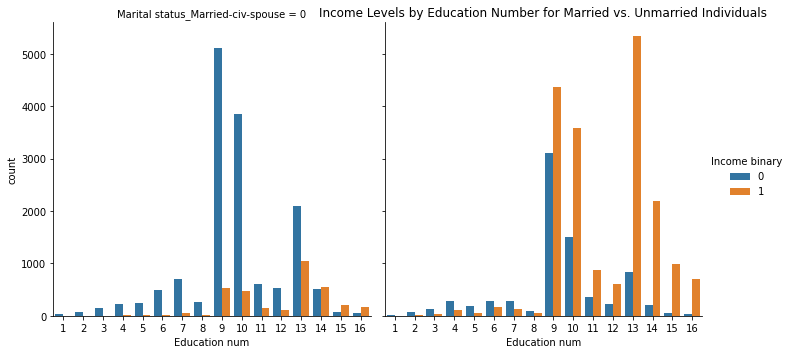

In [48]:
# Pattern 1
# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = df_ohe.toPandas()

# Create the visualization
sns.catplot(x="Education num", hue="Income binary", col="Marital status_Married-civ-spouse", data=pandas_df, kind="count")
plt.title("Income Levels by Education Number for Married vs. Unmarried Individuals")
plt.show()


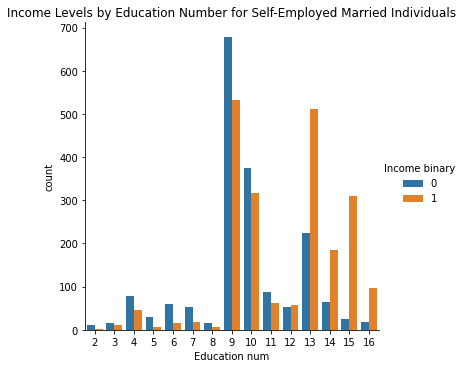

In [49]:
# Pattern 2
self_employed_df = pandas_df[pandas_df["Workclass_Self-emp-not-inc"] == 1]
sns.catplot(x="Education num", hue="Income binary", data=self_employed_df, kind="count")
plt.title("Income Levels by Education Number for Self-Employed Married Individuals")
plt.show()

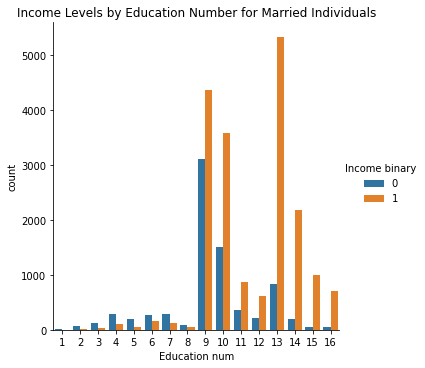

In [50]:
# Pattern 3
married_df = pandas_df[pandas_df["Marital status_Married-civ-spouse"] == 1]
sns.catplot(x="Education num", hue="Income binary", data=married_df, kind="count")
plt.title("Income Levels by Education Number for Married Individuals")
plt.show()

<h2>8. Iterative hyper parameter tuning<h2>

In [51]:
# Build a decision tree model
ite_dt = DecisionTreeClassifier(labelCol="Income binary", featuresCol="features")

# Build paramGrid
ite_paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [3, 5, 7, 10])
             .addGrid(dt.impurity, ["entropy", "gini"])
             .addGrid(dt.maxBins, [20, 40, 60])  # New parameter
             .build())

# Cross validation
ite_evaluator = BinaryClassificationEvaluator(labelCol="Income binary", metricName="areaUnderROC")
ite_cv = CrossValidator(estimator=ite_dt, estimatorParamMaps=ite_paramGrid, evaluator=ite_evaluator, numFolds=3)
ite_cvModel = ite_cv.fit(train_prepared)
ite_bestDtModel = ite_cvModel.bestModel

23/10/11 16:07:04 WARN TaskSetManager: Stage 983 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:05 WARN TaskSetManager: Stage 986 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:05 WARN TaskSetManager: Stage 987 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:05 WARN TaskSetManager: Stage 988 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:05 WARN TaskSetManager: Stage 990 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:05 WARN TaskSetManager: Stage 992 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:05 WARN TaskSetManager: Stage 994 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.

23/10/11 16:07:12 WARN TaskSetManager: Stage 1140 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:12 WARN TaskSetManager: Stage 1151 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:13 WARN TaskSetManager: Stage 1154 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:13 WARN TaskSetManager: Stage 1155 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:13 WARN TaskSetManager: Stage 1156 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:13 WARN TaskSetManager: Stage 1158 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:13 WARN TaskSetManager: Stage 1160 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:07:19 WARN TaskSetManager: Stage 1308 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:19 WARN TaskSetManager: Stage 1319 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:19 WARN TaskSetManager: Stage 1322 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:19 WARN TaskSetManager: Stage 1323 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:19 WARN TaskSetManager: Stage 1324 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:20 WARN TaskSetManager: Stage 1326 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:20 WARN TaskSetManager: Stage 1328 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:07:25 WARN TaskSetManager: Stage 1476 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:26 WARN TaskSetManager: Stage 1487 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:26 WARN TaskSetManager: Stage 1490 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:26 WARN TaskSetManager: Stage 1491 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:26 WARN TaskSetManager: Stage 1492 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:26 WARN TaskSetManager: Stage 1494 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:26 WARN TaskSetManager: Stage 1496 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:07:31 WARN TaskSetManager: Stage 1640 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:31 WARN TaskSetManager: Stage 1642 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:31 WARN TaskSetManager: Stage 1644 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:31 WARN TaskSetManager: Stage 1655 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:32 WARN TaskSetManager: Stage 1658 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:32 WARN TaskSetManager: Stage 1659 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:32 WARN TaskSetManager: Stage 1660 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:07:39 WARN TaskSetManager: Stage 1802 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:39 WARN TaskSetManager: Stage 1804 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:39 WARN TaskSetManager: Stage 1806 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:39 WARN TaskSetManager: Stage 1808 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:39 WARN TaskSetManager: Stage 1810 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:39 WARN TaskSetManager: Stage 1812 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:40 WARN TaskSetManager: Stage 1823 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:07:45 WARN TaskSetManager: Stage 1966 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:45 WARN TaskSetManager: Stage 1967 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:45 WARN TaskSetManager: Stage 1968 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:45 WARN TaskSetManager: Stage 1970 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:45 WARN TaskSetManager: Stage 1972 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:45 WARN TaskSetManager: Stage 1974 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:45 WARN TaskSetManager: Stage 1976 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:07:50 WARN TaskSetManager: Stage 2131 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:50 WARN TaskSetManager: Stage 2134 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:51 WARN TaskSetManager: Stage 2135 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:51 WARN TaskSetManager: Stage 2136 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:51 WARN TaskSetManager: Stage 2138 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:51 WARN TaskSetManager: Stage 2140 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:51 WARN TaskSetManager: Stage 2142 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:07:56 WARN TaskSetManager: Stage 2288 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:56 WARN TaskSetManager: Stage 2299 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:56 WARN TaskSetManager: Stage 2302 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:56 WARN TaskSetManager: Stage 2303 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:56 WARN TaskSetManager: Stage 2304 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:56 WARN TaskSetManager: Stage 2306 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:07:56 WARN TaskSetManager: Stage 2308 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:08:04 WARN TaskSetManager: Stage 2450 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:04 WARN TaskSetManager: Stage 2452 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:04 WARN TaskSetManager: Stage 2454 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:04 WARN TaskSetManager: Stage 2456 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:04 WARN TaskSetManager: Stage 2467 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:04 WARN TaskSetManager: Stage 2470 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:04 WARN TaskSetManager: Stage 2471 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:08:10 WARN TaskSetManager: Stage 2614 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:10 WARN TaskSetManager: Stage 2616 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:10 WARN TaskSetManager: Stage 2618 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:10 WARN TaskSetManager: Stage 2620 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:10 WARN TaskSetManager: Stage 2622 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:10 WARN TaskSetManager: Stage 2624 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:11 WARN TaskSetManager: Stage 2635 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:08:15 WARN TaskSetManager: Stage 2778 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:15 WARN TaskSetManager: Stage 2779 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:15 WARN TaskSetManager: Stage 2780 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:15 WARN TaskSetManager: Stage 2782 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:15 WARN TaskSetManager: Stage 2784 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:15 WARN TaskSetManager: Stage 2786 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:15 WARN TaskSetManager: Stage 2788 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

23/10/11 16:08:20 WARN TaskSetManager: Stage 2932 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:20 WARN TaskSetManager: Stage 2943 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:20 WARN TaskSetManager: Stage 2946 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:20 WARN TaskSetManager: Stage 2947 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:20 WARN TaskSetManager: Stage 2948 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:20 WARN TaskSetManager: Stage 2950 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:20 WARN TaskSetManager: Stage 2952 contains a task of very large size (2832 KiB). The maximum recommended task size is 10

In [52]:
print("-- Best hyper parameters --")
print(f"Best Max Depth: {ite_bestDtModel._java_obj.getMaxDepth()}")
print(f"Best Impurity: {ite_bestDtModel._java_obj.getImpurity()}")
print(f"Best Max Bins: {ite_bestDtModel._java_obj.getMaxBins()}")

-- Best hyper parameters --
Best Max Depth: 5
Best Impurity: gini
Best Max Bins: 32


In [53]:
# Evaluate the new model

# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="Income binary", predictionCol="prediction", metricName="accuracy")
ite_train_accuracy = evaluator.evaluate(ite_bestDtModel.transform(train_prepared))
ite_test_accuracy = evaluator.evaluate(ite_bestDtModel.transform(test_prepared))

print(f"Decision Tree - Training Accuracy: {ite_train_accuracy*100:.2f}%")
print(f"Decision Tree - Test Accuracy: {ite_test_accuracy*100:.2f}%")

# Calculate F1 score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="Income binary", predictionCol="prediction", metricName="f1")
ite_train_f1 = f1_evaluator.evaluate(ite_bestDtModel.transform(train_prepared))
ite_test_f1 = f1_evaluator.evaluate(ite_bestDtModel.transform(test_prepared))

print(f"Decision Tree - Training F1 Score: {ite_train_f1:.4f}")
print(f"Decision Tree - Test F1 Score: {ite_test_f1:.4f}")

# Calculate ROC AUC
roc_evaluator = BinaryClassificationEvaluator(labelCol="Income binary", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
ite_train_roc_auc = roc_evaluator.evaluate(ite_bestDtModel.transform(train_prepared))
ite_test_roc_auc = roc_evaluator.evaluate(ite_bestDtModel.transform(test_prepared))

print(f"Decision Tree - Training ROC AUC: {ite_train_roc_auc:.4f}")
print(f"Decision Tree - Test ROC AUC: {ite_test_roc_auc:.4f}")

23/10/11 16:08:24 WARN TaskSetManager: Stage 3016 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:24 WARN TaskSetManager: Stage 3018 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.


Decision Tree - Training Accuracy: 79.83%
Decision Tree - Test Accuracy: 80.79%


23/10/11 16:08:25 WARN TaskSetManager: Stage 3020 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:26 WARN TaskSetManager: Stage 3022 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.


Decision Tree - Training F1 Score: 0.7982
Decision Tree - Test F1 Score: 0.8076


23/10/11 16:08:26 WARN TaskSetManager: Stage 3024 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.
23/10/11 16:08:27 WARN TaskSetManager: Stage 3035 contains a task of very large size (2832 KiB). The maximum recommended task size is 1000 KiB.


Decision Tree - Training ROC AUC: 0.7369
Decision Tree - Test ROC AUC: 0.7414
